In [1]:
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor,  get_dino_model, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
device = 'cpu'

# dino_model = get_dino_model(load_hf_model=True, device=device)
som_model = get_yolo_model(model_path='finetuned_icon_detect.pt')

# caption_model_processor = get_caption_model_processor("Salesforce/blip2-opt-2.7b", device=device)
# caption_model_processor['model'].to(torch.float32)
# som_model.to(device)



/home/yadonglu/anaconda3/envs/pilot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yadonglu/anaconda3/envs/pilot/lib/python3.9/site-packages/transformers/utils/generic.py:485: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [21]:
som_model.device, type(som_model) #, type(dino_model['model']), isinstance(som_model, YOLO) dino_model['model'].device, 

(device(type='cpu'), ultralytics.models.yolo.model.YOLO)

In [2]:

platform = 'pc'
cnt = 0
image_path = 'imgs/pc_1.png'
# image_path = 'imgs/mobile_4.png'
# get dino labeled image
if platform == 'pc':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
elif platform == 'web':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
elif platform == 'mobile':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
image = Image.open(image_path)
image_rgb = image.convert('RGB')

ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9})
text, ocr_bbox = ocr_bbox_rslt

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=False, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=None, ocr_text=text,use_local_semantics=False)





image 1/1 /home/yadonglu/sandbox/screenparsing_collab/screenparsing/omniparser/examples/pc_1.png: 800x1280 210 icons, 69.9ms
Speed: 7.7ms preprocess, 69.9ms inference, 1.7ms postprocess per image at shape (1, 3, 800, 1280)
boxes cpu


In [13]:
label_coordinates, parsed_content_list[0].split(': ')[1]

({'0': array([         94,          38,          95,          24], dtype=float32),
  '1': array([        628,          35,         153,          30], dtype=float32),
  '2': array([        813,          35,         125,          27], dtype=float32),
  '3': array([        985,          35,         100,          27], dtype=float32),
  '4': array([       1362,          33,          85,          29], dtype=float32),
  '5': array([       2578,          34,          77,          32], dtype=float32),
  '6': array([         38,         114,          47,          29], dtype=float32),
  '7': array([        129,         114,          80,          29], dtype=float32),
  '8': array([        241,         114,          74,          29], dtype=float32),
  '9': array([        347,         114,          70,          29], dtype=float32),
  '10': array([        445,         113,          92,          36], dtype=float32),
  '11': array([        570,         111,         133,          32], dtype=float32),
  

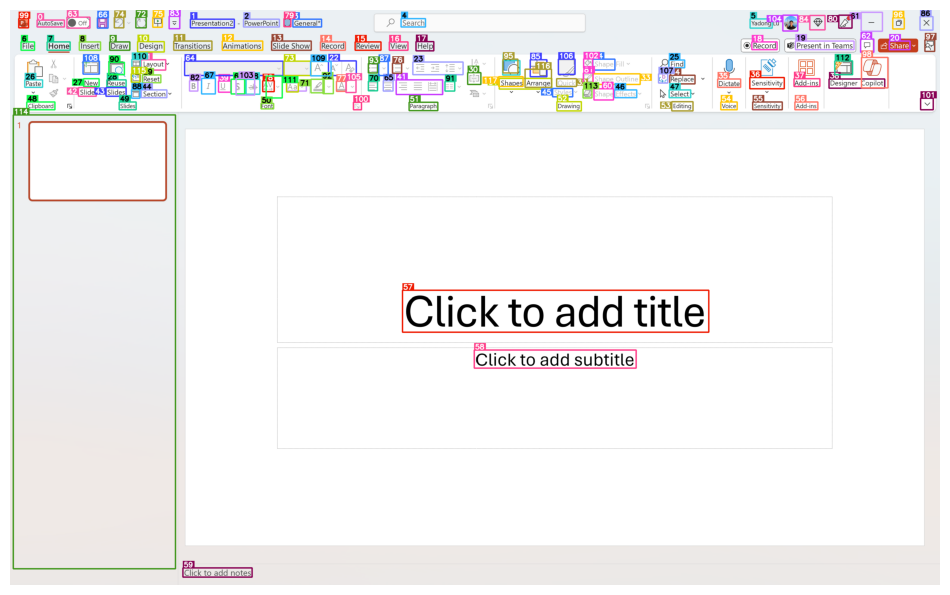

In [3]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(12,12))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)


# wrapped Omniparser

In [6]:
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor,  get_dino_model, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
from typing import Dict, Tuple, List
import io
import base64


config = {
    'som_model_path': 'finetuned_icon_detect.pt',
    'device': 'cpu',
    'caption_model_path': 'Salesforce/blip2-opt-2.7b',
    'draw_bbox_config': {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    },
    'BOX_TRESHOLD': 0.05
}


class Omniparser(object):
    def __init__(self, config: Dict):
        self.config = config
        
        self.som_model = get_yolo_model(model_path=config['som_model_path'])
        # self.caption_model_processor = get_caption_model_processor(config['caption_model_path'], device=cofig['device'])
        # self.caption_model_processor['model'].to(torch.float32)

    def parse(self, image_path: str):
        print('Parsing image:', image_path)
        ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9})
        text, ocr_bbox = ocr_bbox_rslt

        draw_bbox_config = self.config['draw_bbox_config']
        BOX_TRESHOLD = self.config['BOX_TRESHOLD']
        dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, self.som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=False, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=None, ocr_text=text,use_local_semantics=False)
        
        image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
        # formating output
        return_list = [{'from': 'omniparser', 'shape': {'x':coord[0], 'y':coord[1], 'width':coord[2], 'height':coord[3]},
                        'text': parsed_content_list[i].split(': ')[1], 'type':'text'} for i, (k, coord) in enumerate(label_coordinates.items()) if i < len(parsed_content_list)]
        return_list.extend(
            [{'from': 'omniparser', 'shape': {'x':coord[0], 'y':coord[1], 'width':coord[2], 'height':coord[3]},
                        'text': 'None', 'type':'icon'} for i, (k, coord) in enumerate(label_coordinates.items()) if i >= len(parsed_content_list)]
              )

        return [image, return_list]
    
parser = Omniparser(config)
image_path = 'imgs/pc_1.png'

#  time the parser
import time
s = time.time()
image, parsed_content_list = parser.parse(image_path)
device = config['device']
print(f'Time taken for Omniparser on {device}:', time.time() - s)


Parsing image: examples/pc_1.png

image 1/1 /home/yadonglu/sandbox/screenparsing_collab/screenparsing/omniparser/examples/pc_1.png: 800x1280 210 icons, 55.6ms
Speed: 7.7ms preprocess, 55.6ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 1280)
boxes cpu
Time taken for Omniparser on cpu: 2.029506206512451


In [3]:
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor,  get_dino_model, get_yolo_model, predict_yolo
import torch
from ultralytics import YOLO
from PIL import Image
from typing import Dict, Tuple, List
import io
import base64


config = {
    'som_model_path': 'finetuned_icon_detect.pt',
    'device': 'cpu',
    'caption_model_path': 'Salesforce/blip2-opt-2.7b',
    'draw_bbox_config': {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    },
    'BOX_TRESHOLD': 0.05
}

class OmniparserYOLO(object):
    def __init__(self, config: Dict):
        self.config = config
        self.som_model = get_yolo_model(model_path=config['som_model_path'])

    def parse(self, image):
        draw_bbox_config = self.config['draw_bbox_config']
        BOX_TRESHOLD = self.config['BOX_TRESHOLD']
        xyxy, logits, phrases = predict_yolo(model=self.som_model, image_path=image, box_threshold=BOX_TRESHOLD)
        # print('xyxy:', xyxy)
        xyxy = xyxy.tolist()
        # formating output
        return_list = [{'from': 'omniparserYOLO', 'shape': {'x':coord[0], 'y':coord[1], 'width':coord[2]-coord[0], 'height':coord[3] - coord[1]},
                        'text': 'None', 'type':'icon'} for i, coord in enumerate(xyxy)]
        
        return [None, return_list]
    
parser = OmniparserYOLO(config)
image_path = 'imgs/pc_1.png'
image = Image.open(image_path)

#  time the parser
import time
s = time.time()
_, parsed_content_list = parser.parse(image)
device = config['device']
print(f'Time taken for Omniparser finetuned YOLO module on {device}:', time.time() - s)

0: 800x1280 210 icons, 49.4ms
Speed: 5.7ms preprocess, 49.4ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 1280)
boxes cpu
Time taken for Omniparser finetuned YOLO module on cpu: 0.2898883819580078


# florence caption model

In [9]:
from transformers import AutoProcessor, AutoModelForCausalLM 
import torch
device = 'cpu'
torch_dtype = torch.float16 if device == 'cuda' else torch.float32
model = AutoModelForCausalLM.from_pretrained("/home/yadonglu/sandbox/data/orca/florence-2-base-ft-fft_rai_win_ep5/epoch_5", torch_dtype=torch_dtype, trust_remote_code=True).to(device)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-base", trust_remote_code=True)


/home/yadonglu/anaconda3/envs/pilot/lib/python3.9/site-packages/transformers/utils/generic.py:342: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/yadonglu/anaconda3/envs/pilot/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [11]:
from PIL import Image
prompt = "<CAPTION>"
image_path = 'imgs/settings.png'
image = [Image.open(image_path).convert('RGB')]
inputs = processor(images=image, text=[prompt]*len(image), return_tensors="pt").to(device=device)
generated_ids = model.generate(input_ids=inputs["input_ids"],pixel_values=inputs["pixel_values"],max_new_tokens=1024,num_beams=3, do_sample=False)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
generated_text = [gen.strip() for gen in generated_text]
generated_text

['settings or configuration options.']